In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)
from tensorflow import keras
from tensorflow.keras import layers



TensorFlow version: 2.20.0


In [ ]:
import numpy as np

train_data = np.load("train_data.npy")
test_data = np.load("test_data.npy")

train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (5789, 30, 1)
Test shape: (1448, 30, 1)


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Load your preprocessed data
train_data = np.load("train_data.npy")
test_data = np.load("test_data.npy")

# Reshape data for LSTM input [samples, timesteps, features]
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], 1))

print("Train shape:", train_data.shape)
print("Test shape:", test_data.shape)


Train shape: (5789, 30, 1)
Test shape: (1448, 30, 1)


In [ ]:
model = keras.Sequential([
    # Encoder: learns compressed representation of input
    layers.LSTM(64, input_shape=(train_data.shape[1], train_data.shape[2]), return_sequences=True),
    layers.LSTM(32, return_sequences=False),
    
    # Bottleneck: the “memory” of what normal looks like
    layers.RepeatVector(train_data.shape[1]),

    # Decoder: tries to reconstruct the input
    layers.LSTM(32, return_sequences=True),
    layers.LSTM(64, return_sequences=True),

    # Output: 1 feature (temperature) per time step
    layers.TimeDistributed(layers.Dense(1))
])

model.compile(optimizer='adam', loss='mse')
model.summary()


c:\Users\bimba\.vscode\Megaminds_Assignment\megamassign\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ repeat_vector (RepeatVector)    │ (None, 30, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 30, 32)         │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 30, 64)         │        24,832 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, 30, 1)          │            65 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 62,529 (244.25 KB)

 Trainable params: 62,529 (244.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    train_data, train_data,      # input = output
    epochs=50,                   # number of training passes
    batch_size=64,               # how many sequences per training step
    validation_split=0.1,        # 10% of data used for validation
    shuffle=True
)


Epoch 1/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 30s 115ms/step - loss: 0.0376 - val_loss: 0.0090
Epoch 2/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 3/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 83ms/step - loss: 0.0022 - val_loss: 0.0038
Epoch 4/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0021 - val_loss: 0.0038
Epoch 5/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 92ms/step - loss: 0.0021 - val_loss: 0.0037
Epoch 6/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 6s 77ms/step - loss: 0.0020 - val_loss: 0.0036
Epoch 7/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms/step - loss: 0.0019 - val_loss: 0.0034
Epoch 8/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 79ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 9/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0017 - val_loss: 0.0028
Epoch 10/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 7s 81ms/step - loss: 0.0016 - val_loss: 0.0031
Epoch 11/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 98ms/step - loss: 0.0016 - val_loss: 0.0026
Epoch 12/50
82/82 ━━━━━━━━━━━━━━━━━━━━ 8s 90ms/step - loss: 0

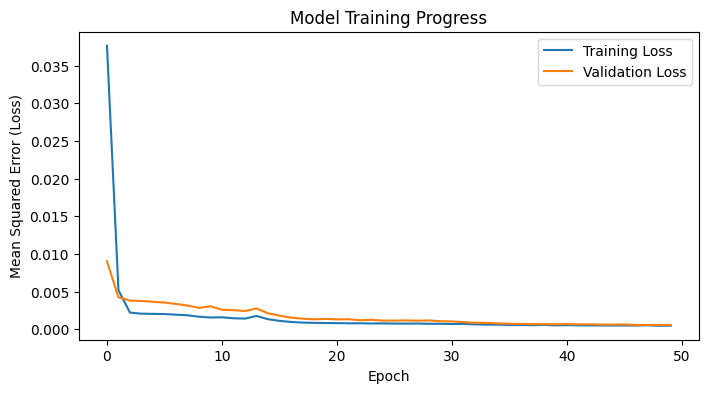

In [ ]:
plt.figure(figsize=(8,4))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training Progress')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error (Loss)')
plt.legend()
plt.show()


In [ ]:
model.save("lstm_autoencoder_model.keras")


In [ ]:
model = keras.models.load_model("lstm_autoencoder_model.keras")


c:\Users\bimba\.vscode\Megaminds_Assignment\megamassign\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 16 variables whereas the saved optimizer has 30 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))
